### Point 8

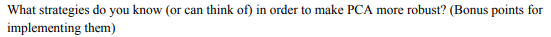

Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction and data compression. To make PCA more robust, several strategies can be employed:

1. Standardization (Z-score normalization): Before applying PCA, it's important to standardize the data by subtracting the mean and dividing by the standard deviation. This ensures that all variables contribute equally to the analysis.

2. Outlier Detection and Handling:

Mahalanobis Distance: Identify and remove outliers using statistical methods.

Robust PCA: Use robust PCA algorithms like Randomized SVD, which are less sensitive to outliers.

3. Using a Covariance Matrix:

Instead of the standard covariance matrix, use alternative covariance estimators like the robust M-estimators or shrinkage estimators.

4. Rank Estimation:

Use techniques like Singular Value Thresholding (SVT) to estimate the true rank of the data matrix.

5. Handling Missing Data:

Impute missing values before applying PCA using techniques like mean imputation, regression imputation, or matrix completion methods.

6. Sparse PCA:

Instead of the traditional PCA, consider using Sparse PCA which promotes sparsity in the loadings, making the resulting components more interpretable and potentially robust to outliers.

7. Kernel PCA:

Use Kernel PCA when the data is not linearly separable. Kernels can help in capturing non-linear relationships in the data.

8. Cross-Validation:

Perform cross-validation to assess the stability of the principal components.

9. Data Preprocessing Techniques:

Use techniques like Winsorizing to replace extreme values with less extreme ones, or apply non-linear transformations to make the data more Gaussian.

10. Ensemble PCA:

Combine results from multiple PCA runs with different random initializations or subsets of the data to increase stability.

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import MinCovDet
from sklearn.decomposition import PCA

# Sample data (replace with your dataset)
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Outlier detection and handling using MCD
mcd = MinCovDet()
mcd.fit(X_scaled)

# Define an appropriate threshold for Mahalanobis distance
threshold = 3.0  # Adjust this threshold as needed

mahalanobis_distances = mcd.mahalanobis(X_scaled)
outliers = np.where(mahalanobis_distances > threshold)

# Remove outliers
X_cleaned = np.delete(X_scaled, outliers, axis=0)

# Step 3: Apply PCA to the cleaned data
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca.fit(X_cleaned)
X_pca = pca.transform(X_cleaned)

# Now, X_pca contains the PCA-transformed data without outliers and standardized features.